In [118]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate data for the DataFrame
data = {
    'employee_id': range(1, 251),
    'employee_name': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], size=250),
    'designation': np.random.choice(['Executive', 'Senior Executive', 'Manager', 'Senior Manager'], size=232).tolist() + [np.nan] * 18,
    'experience': np.random.choice([np.nan] * 25 + list(range(12, 120)), size=250),
    'salary': np.random.randint(20000, 60001, size=250)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,employee_id,employee_name,designation,experience,salary
0,1,David,Executive,108.0,56932
1,2,Eva,Senior Manager,NaN,47169
2,3,Charlie,Senior Manager,20.0,27941
3,4,Eva,Senior Executive,82.0,34388
4,5,Eva,Senior Manager,112.0,25569


In [119]:
df.isnull().sum()

employee_id       0
employee_name     0
designation      18
experience       45
salary            0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employee_id    250 non-null    int64  
 1   employee_name  250 non-null    object 
 2   designation    232 non-null    object 
 3   experience     205 non-null    float64
 4   salary         250 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 8.9+ KB


In [121]:
df.columns

Index(['employee_id', 'employee_name', 'designation', 'experience', 'salary'], dtype='object')

In [122]:
# Handling missing values
df['designation'].fillna(df['designation'].mode()[0], inplace=True)
df['experience'].fillna(df['experience'].median(), inplace=True)

In [123]:
df.isnull().sum()

employee_id      0
employee_name    0
designation      0
experience       0
salary           0
dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employee_id    250 non-null    int64  
 1   employee_name  250 non-null    object 
 2   designation    250 non-null    object 
 3   experience     250 non-null    float64
 4   salary         250 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 8.9+ KB


In [125]:
#Removing the name column
df = df[['employee_id','designation', 'experience', 'salary']]

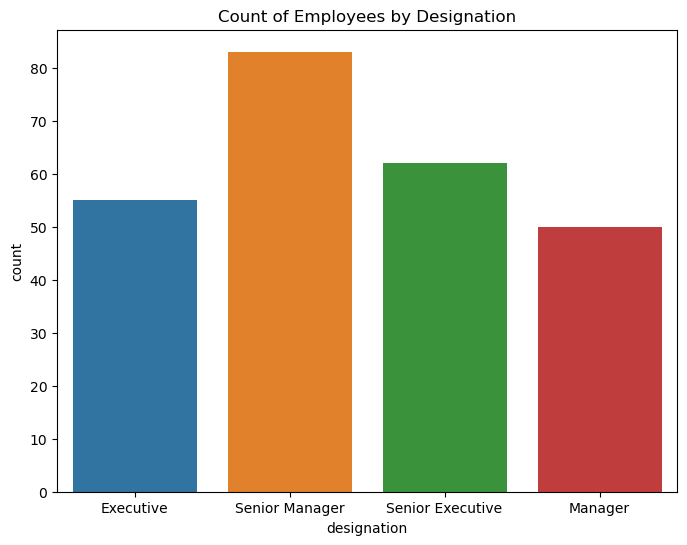

In [126]:
# Countplot for 'designation'
plt.figure(figsize=(8, 6))
sns.countplot(x='designation', data=df)
plt.title('Count of Employees by Designation')
plt.show()

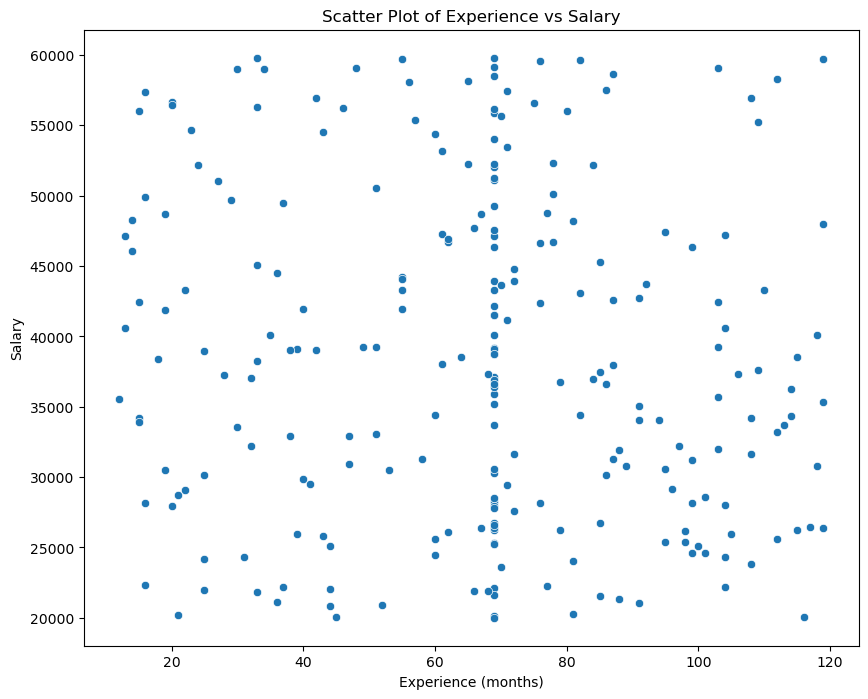

In [127]:
# Scatter plot for 'experience' vs 'salary'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='experience', y='salary', data=df)
plt.title('Scatter Plot of Experience vs Salary')
plt.xlabel('Experience (months)')
plt.ylabel('Salary')
plt.show()


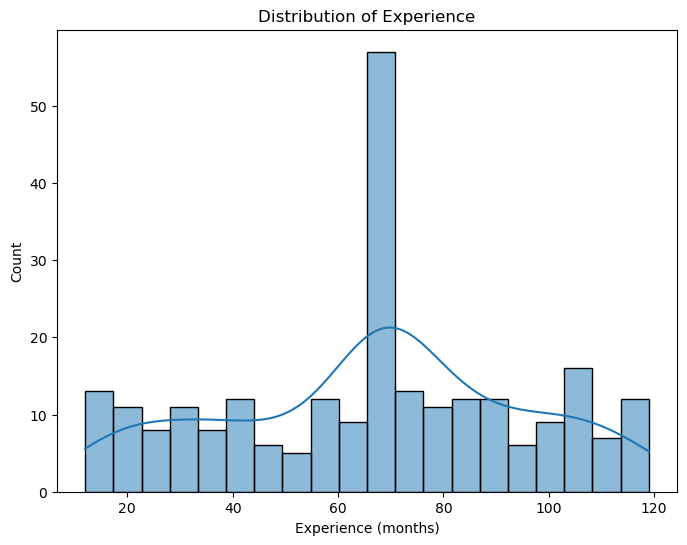

In [128]:
# Histogram for 'experience'
plt.figure(figsize=(8, 6))
sns.histplot(df['experience'], bins=20, kde=True)
plt.title('Distribution of Experience')
plt.xlabel('Experience (months)')
plt.show()

In [129]:
# Apply one-hot encoding to the 'designation' column
df = pd.get_dummies(df, columns=['designation'], prefix='designation', drop_first=True)
df.head()

,employee_id,experience,salary,designation_Manager,designation_Senior Executive,designation_Senior Manager
0,1,108.0,56932,0,0,0
1,2,69.0,47169,0,0,1
2,3,20.0,27941,0,0,1
3,4,82.0,34388,0,1,0
4,5,112.0,25569,0,0,1


In [144]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standard scaling to the relevant columns
columns_to_scale = ['experience', 'salary']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame after scaling
df.head()


,employee_id,experience,salary,designation_Manager,designation_Senior Executive,designation_Senior Manager
0,1,1.456038,1.587502,-0.5,-0.574271,-0.704987
1,2,0.078819,0.749352,-0.5,-0.574271,1.418467
2,3,-1.651532,-0.901366,-0.5,-0.574271,1.418467
3,4,0.537892,-0.347893,-0.5,1.741338,-0.704987
4,5,1.597291,-1.105001,-0.5,-0.574271,1.418467


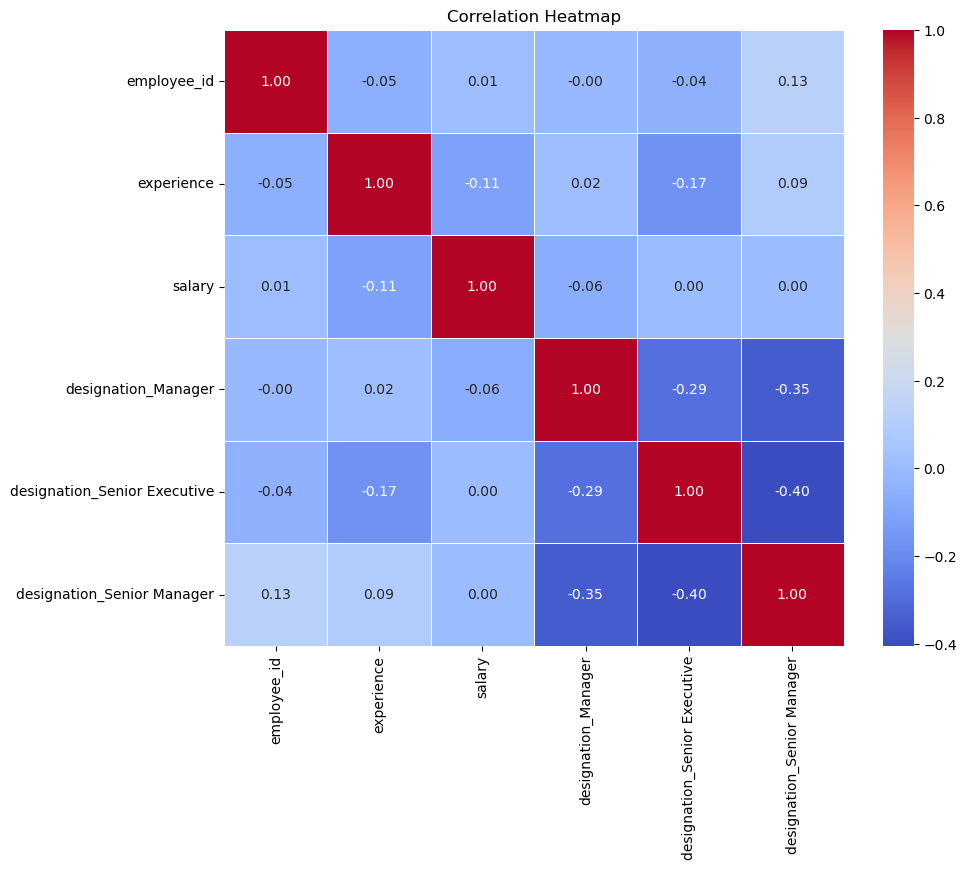

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [146]:
# Segregate independent and dependent variables
X = df.drop('salary', axis=1)  # X contains all columns except 'salary'
y = df['salary']  # y contains only the 'salary' column

# Display the first few rows of X and y
print("Independent Variables (X):")
X.head()

Independent Variables (X):


,employee_id,experience,designation_Manager,designation_Senior Executive,designation_Senior Manager
0,1,1.456038,-0.5,-0.574271,-0.704987
1,2,0.078819,-0.5,-0.574271,1.418467
2,3,-1.651532,-0.5,-0.574271,1.418467
3,4,0.537892,-0.5,1.741338,-0.704987
4,5,1.597291,-0.5,-0.574271,1.418467


In [147]:
print("\nDependent Variable (y):")
y.head()



Dependent Variable (y):


0    1.587502
1    0.749352
2   -0.901366
3   -0.347893
4   -1.105001
Name: salary, dtype: float64

In [148]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (200, 5)
X_test shape: (50, 5)
y_train shape: (200,)
y_test shape: (50,)


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training set
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear_reg_model, X, y, cv=kf, scoring='r2')

print("\nCross-Validation Scores:")
print(cv_scores)
print("Mean Cross-Validation R-squared:", np.mean(cv_scores))


Mean Squared Error: 0.9654418464072255
R-squared: 0.011014260944299692

Cross-Validation Scores:
[ 0.01101426 -0.05297105 -0.01055836 -0.03736074 -0.00619847]
Mean Cross-Validation R-squared: -0.01921487021563386


In [150]:
import pandas as pd
import numpy as np

# Create a random new data with the same format
new_data = pd.DataFrame({
    'employee_id': [251, 252, 253],
    'experience': np.random.randint(12, 120, size=3),
    'designation': np.random.choice(['Executive', 'Senior Executive', 'Manager', 'Senior Manager'], size=3),
})

# Perform one-hot encoding for 'designation'
new_data = pd.get_dummies(new_data, columns=['designation'], prefix='designation')

# Add missing one-hot encoded columns if they are not present in the new data
missing_columns = set(X.columns) - set(new_data.columns)
for column in missing_columns:
    new_data[column] = 0

# Display the new data
print("New Data:")
new_data.head()


New Data:


,employee_id,experience,designation_Executive,designation_Manager,designation_Senior Manager,designation_Senior Executive
0,251,47,0,1,0,0
1,252,47,0,1,0,0
2,253,37,1,0,0,0
